In [1]:
import scanpy as sc
from umap import UMAP
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import DBSCAN

In [2]:
data = sc.read('Single_cell_atlas_of_peripheral_immune_response_to_SARS_CoV_2_infection.h5ad')
data.X = normalize(data.X)
data.obs

,Admission,ClusterID,DPS,DTF,Donor_full,HLA1,IFN1,Sex,Status,Ventilated,...,nCount_RNA,nCount_SCT,nFeature_RNA,nFeature_SCT,percent_mt,percent_rpl,percent_rps,percent_rrna,seurat_clusters,singler
covid_555_1.1,ICU,13,9,9,C1 A,-0.026053,0.015625,M,COVID,NonVent,...,1222.0,1682.0,125,126,1.309329,0.245499,0.081833,46.644844,12,Erythroblast
covid_555_1.2,ICU,10,9,9,C1 A,0.023525,-0.000322,M,COVID,NonVent,...,1099.0,1700.0,160,160,13.102820,0.363967,0.363967,58.780708,9,B_cell
covid_555_1.3,ICU,19,9,9,C1 A,-0.044271,0.086385,M,COVID,NonVent,...,1055.0,1661.0,212,213,2.938389,0.947867,0.663507,55.829384,18,B_cell
covid_555_1.7,ICU,10,9,9,C1 A,-0.038040,0.022590,M,COVID,NonVent,...,2411.0,1971.0,312,312,10.908337,0.165906,0.041477,67.399422,9,B_cell
covid_555_1.8,ICU,22,9,9,C1 A,-0.043605,0.010739,M,COVID,NonVent,...,2276.0,1948.0,336,336,11.203866,0.307557,0.263620,67.355011,21,B_cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HIP045.2543,N/A,7,0,0,H6,0.588374,0.092001,M,Healthy,Healthy,...,6103.0,1959.0,2460,1080,6.898247,3.637555,2.867442,10.797968,6,Monocyte
HIP045.2544,N/A,21,0,0,H6,1.295145,0.045697,M,Healthy,Healthy,...,7324.0,2088.0,2488,1031,6.485527,6.157837,4.929000,12.738940,20,Monocyte
HIP045.2545,N/A,21,0,0,H6,0.892457,0.062819,M,Healthy,Healthy,...,6368.0,1929.0,2511,1021,4.742462,6.171483,4.978015,14.400126,20,T_cells
HIP045.2546,N/A,11,0,0,H6,0.020954,0.036953,M,Healthy,Healthy,...,6669.0,1918.0,2650,1063,4.573400,3.328835,2.998950,14.574899,10,Monocyte


In [ ]:
# ill, healthy = data.X[data.obs['Status'] == 'COVID', :], data.X[data.obs['Status'] == 'Healthy', :]

In [6]:
ill, illobs = data.X[data.obs['Ventilated'] != 'Healthy'], data.obs[data.obs['Ventilated'] != 'Healthy']

In [7]:
trans = UMAP().fit_transform(ill)

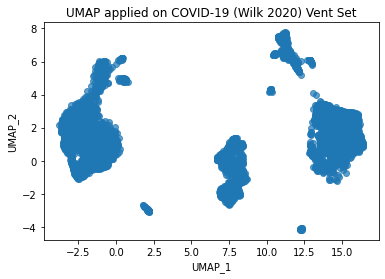

In [8]:
plt.scatter(
    trans[illobs['Ventilated'] == 'Vent', 0], # first column as X
    trans[illobs['Ventilated'] == 'Vent', 1], # second column as Y
    alpha=.7
)
plt.xlabel("UMAP_1")
plt.ylabel("UMAP_2")
plt.title("UMAP applied on COVID-19 (Wilk 2020) Vent Set");

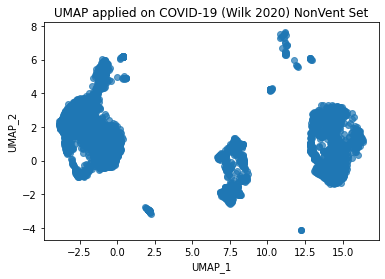

In [10]:
plt.scatter(
    trans[illobs['Ventilated'] == 'NonVent', 0], # first column as X
    trans[illobs['Ventilated'] == 'NonVent', 1], # second column as Y
    alpha=.7
)
plt.xlabel("UMAP_1")
plt.ylabel("UMAP_2")
plt.title("UMAP applied on COVID-19 (Wilk 2020) NonVent Set");

---------

In [ ]:
clustering = DBSCAN().fit(ill)

In [ ]:
plt.scatter(
    trans[:, 0], # first column as X
    trans[:, 1], # second column as Y
    alpha=.7,
    c=clustering.labels_
)
plt.xlabel("UMAP_1")
plt.ylabel("UMAP_2")
plt.title("DBSCAN applied on COVID-19 (Wilk 2020) Set");